In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.max_columns = 999
plt.style.use('default')
from matplotlib import ticker

In [2]:
!pip install openpyxl

## GDP

In [3]:
gdps= pd.read_excel('gdps.xlsx')

In [4]:
def clean(df,column): 
    #choose data
    df=df[df['Series Name']==column]
    #set rown name to country name 
    df=df.set_index('Country Name')
    #get did of first unnecessary columns
    df=df.iloc[:,3:]
    #replace .. mark by NA 
    df=df.replace("..",np.nan)
    #rename columns so that include only year
    df.columns=[col[:4] for col in df.columns]
    return df

In [5]:
gdp1=clean(gdps,'GDP (current US$)')
gdp2=clean(gdps,'GDP (constant 2015 US$)')
gdp3=clean(gdps,'GDP, PPP (constant 2017 international $)')
gdp4=clean(gdps,'GDP per capita, PPP (constant 2017 international $)')

/tmp/ipykernel_791/4090944438.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace("..",np.nan)


In [35]:
def plotyears(dfplot,countries,billion,header): 
    cumsum=dfplot.transpose()
    fig,ax = plt.subplots(figsize=(16, 5))
    for i in countries: 
        ax.plot(cumsum.index, cumsum[i],label=i)
    ax.legend(loc='upper center', bbox_to_anchor=(0.2, 0.9),ncol=3, fancybox=True, shadow=True)
    plt.ticklabel_format(style='plain', axis='y')
    if billion==1: 
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: format(x/1000000000,'1.1f')+'B'))
    plt.xticks(rotation=90)
    ax.set_title(header, fontsize=10)
    ax.set_xlabel('Year', fontsize=15)
    #ax.set_ylabel(y, fontsize=15)
    plt.show() 

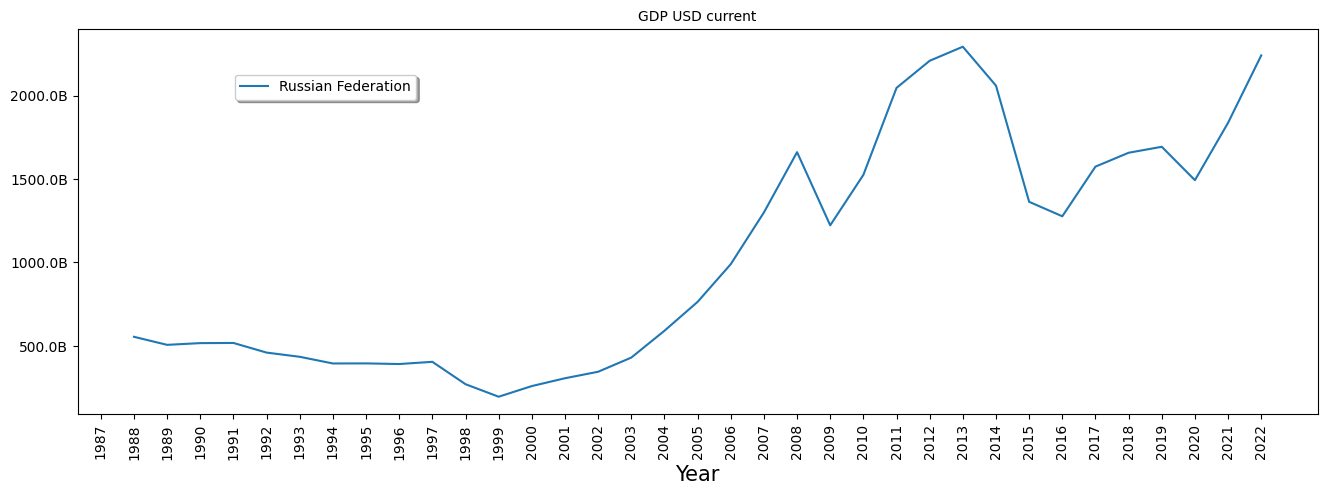

In [36]:
plotyears(gdp1,['Russian Federation'],1,'GDP USD current')

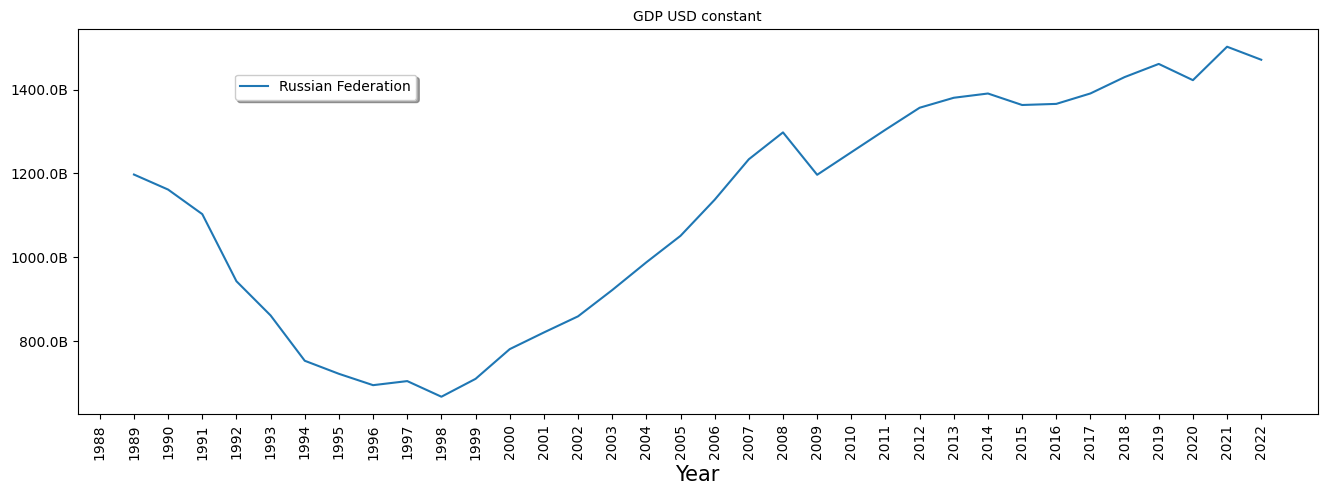

In [37]:
plotyears(gdp2,['Russian Federation'],1,'GDP USD constant')

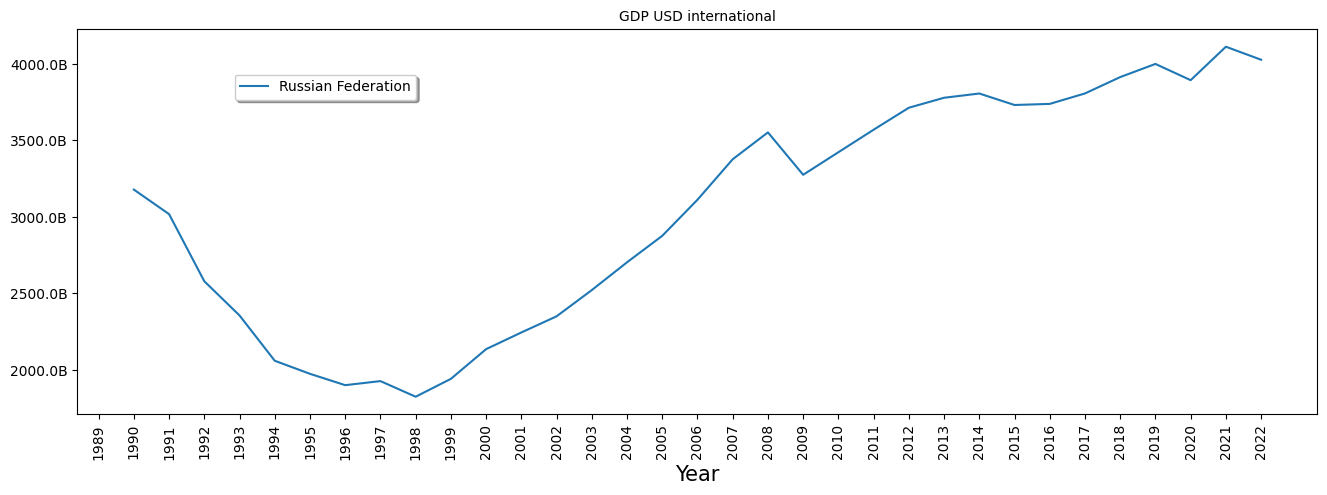

In [38]:
plotyears(gdp3,['Russian Federation'],1,'GDP USD international')

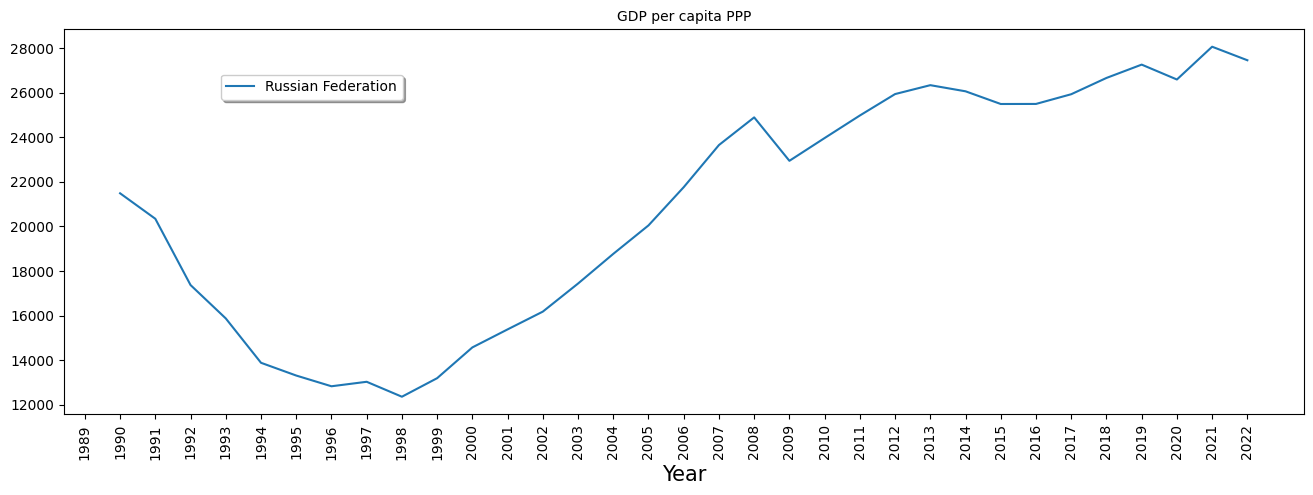

In [39]:
plotyears(gdp4,['Russian Federation'],0,'GDP per capita PPP')

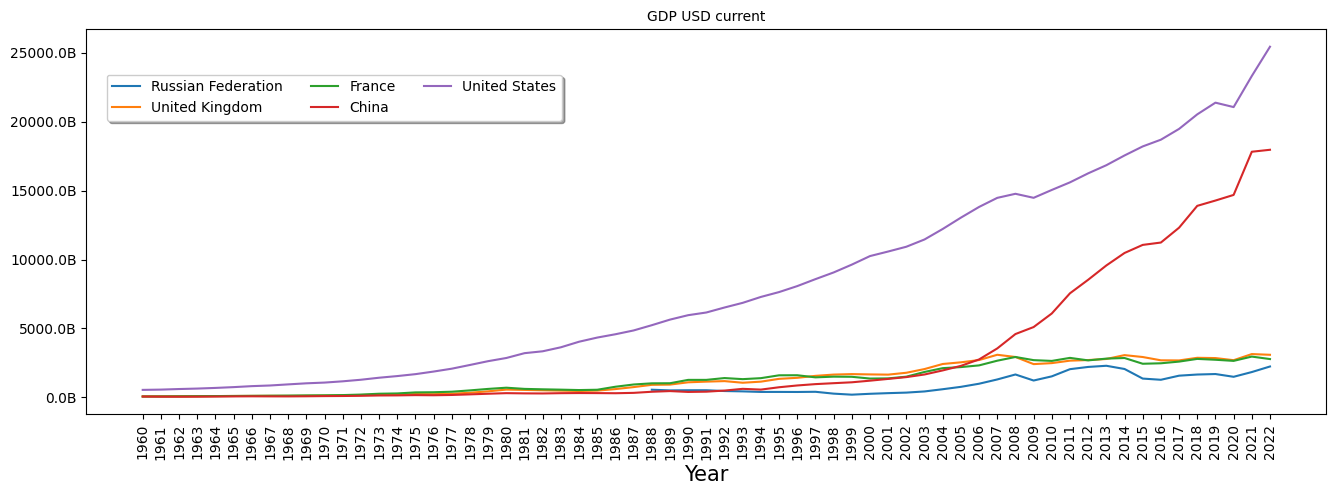

In [40]:
plotyears(gdp1,['Russian Federation','United Kingdom','France','China','United States'],1,'GDP USD current')

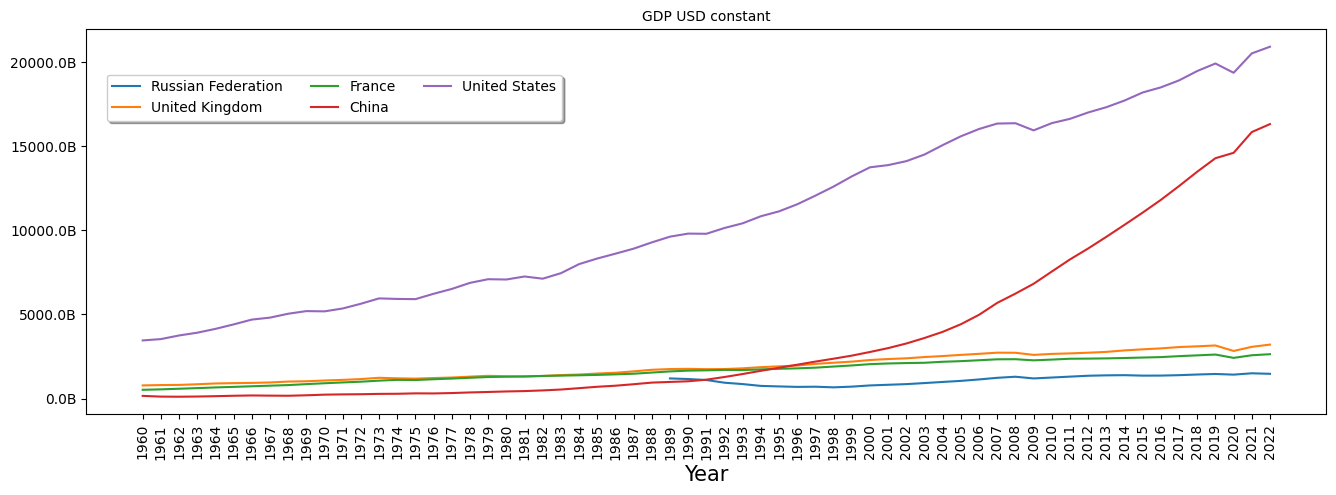

In [41]:
plotyears(gdp2,['Russian Federation','United Kingdom','France','China','United States'],1,'GDP USD constant')

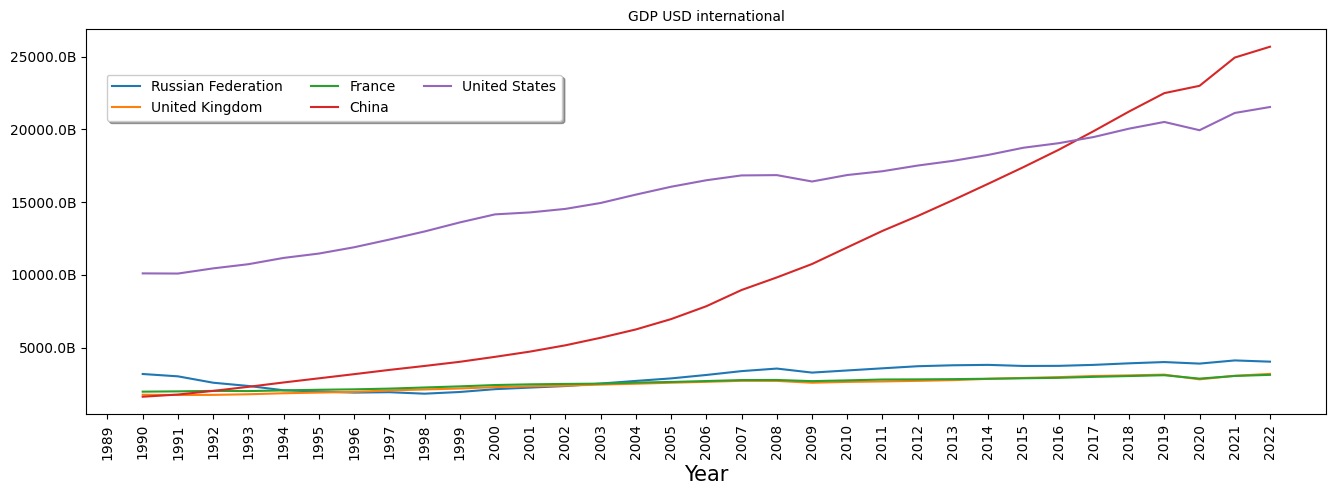

In [42]:
plotyears(gdp3,['Russian Federation','United Kingdom','France','China','United States'],1,'GDP USD international')

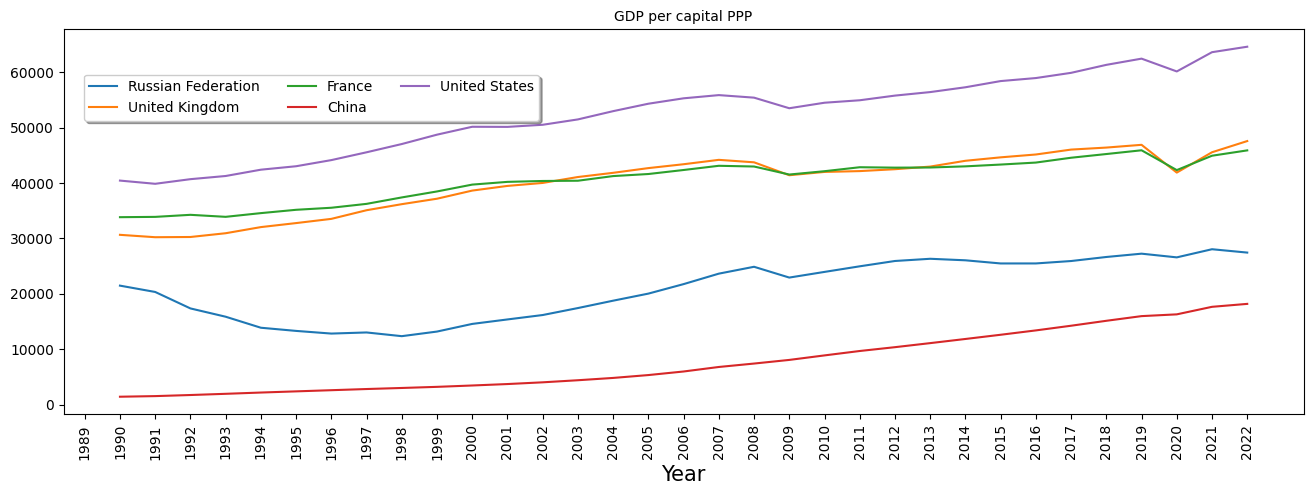

In [43]:
plotyears(gdp4,['Russian Federation','United Kingdom','France','China','United States'],0,'GDP per capital PPP')

## Military spending 

In [51]:
mil= pd.read_excel("gdps.xlsx")
mil['Series Name'].unique()

array(['GDP (constant 2015 US$)', 'GDP (current US$)',
       'GDP, PPP (constant 2017 international $)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Military expenditure (% of GDP)',
       'Military expenditure (% of general government expenditure)',
       'Military expenditure (current USD)', nan], dtype=object)

In [52]:
def clean(df,column): 
    df=df[df['Series Name']==column]
    df=df.set_index('Country Name')
    df=df.iloc[:,3:]
    df=df.replace("..",np.nan)
    df.columns=[col[:4] for col in df.columns]
    df.columns=[str(col) for col in df.columns]
    return df

In [56]:
mil1=clean(mil,'Military expenditure (current USD)')
mil2=clean(mil,'Military expenditure (% of general government expenditure)')
mil3=clean(mil,'Military expenditure (% of GDP)')

/tmp/ipykernel_791/752492981.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace("..",np.nan)


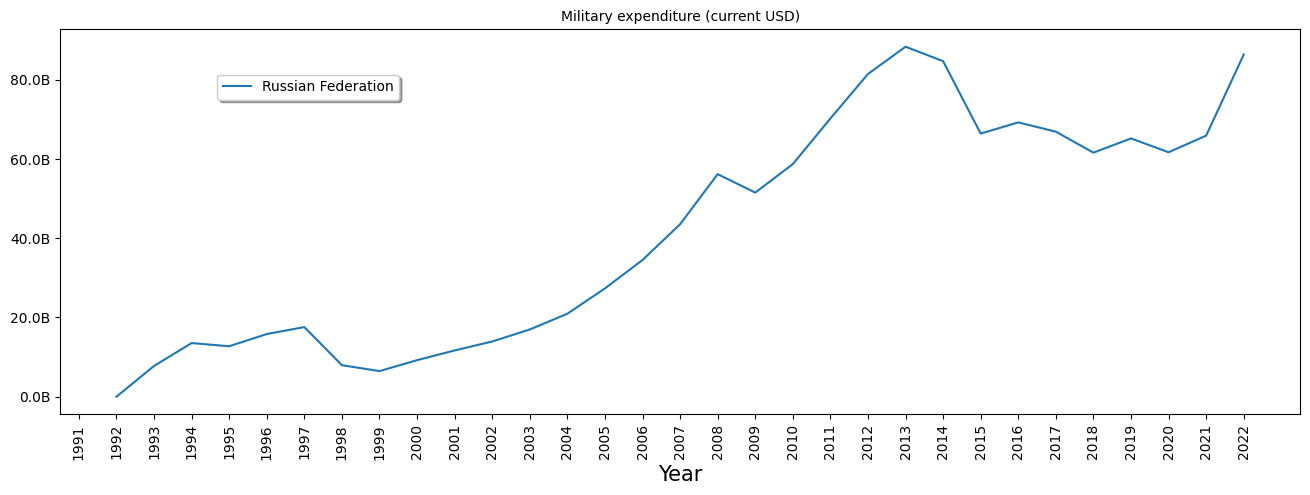

In [57]:
plotyears(mil1,['Russian Federation'],1,'Military expenditure (current USD)')

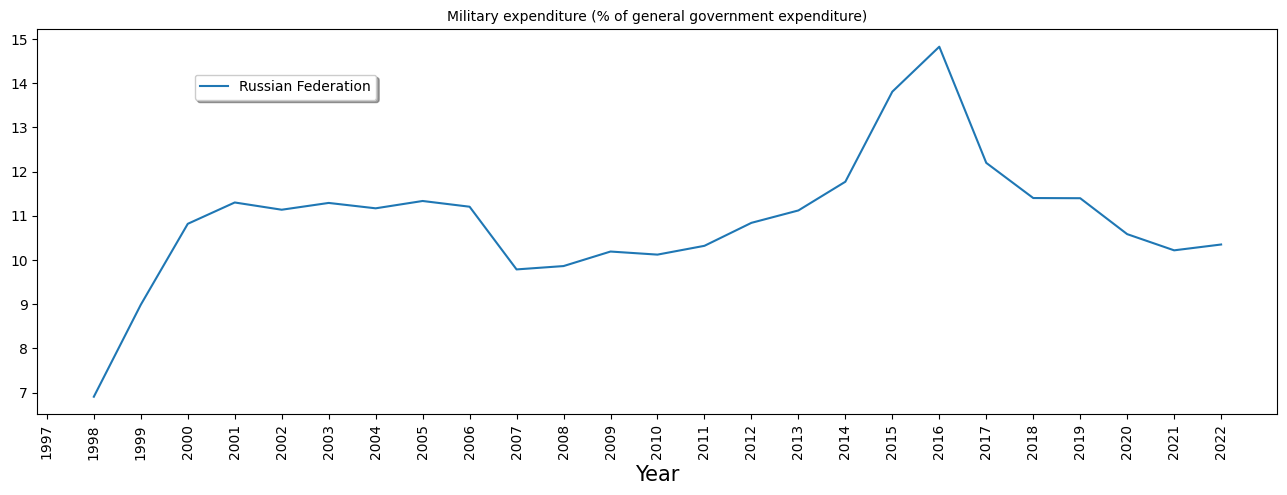

In [59]:
plotyears(mil2,['Russian Federation'],0,'Military expenditure (% of general government expenditure)')

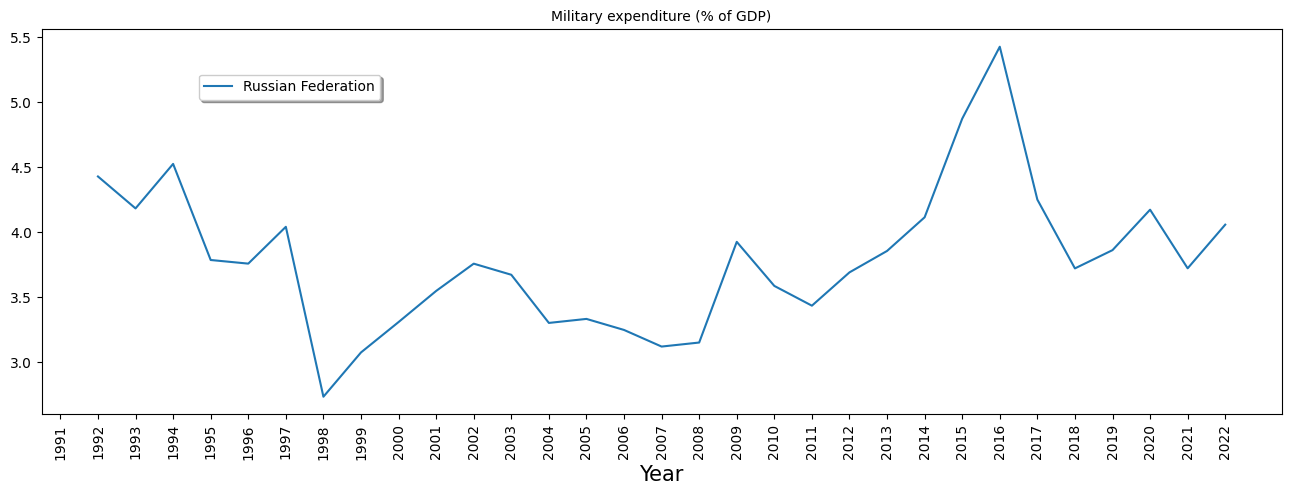

In [60]:
plotyears(mil3,['Russian Federation'],0,'Military expenditure (% of GDP)')

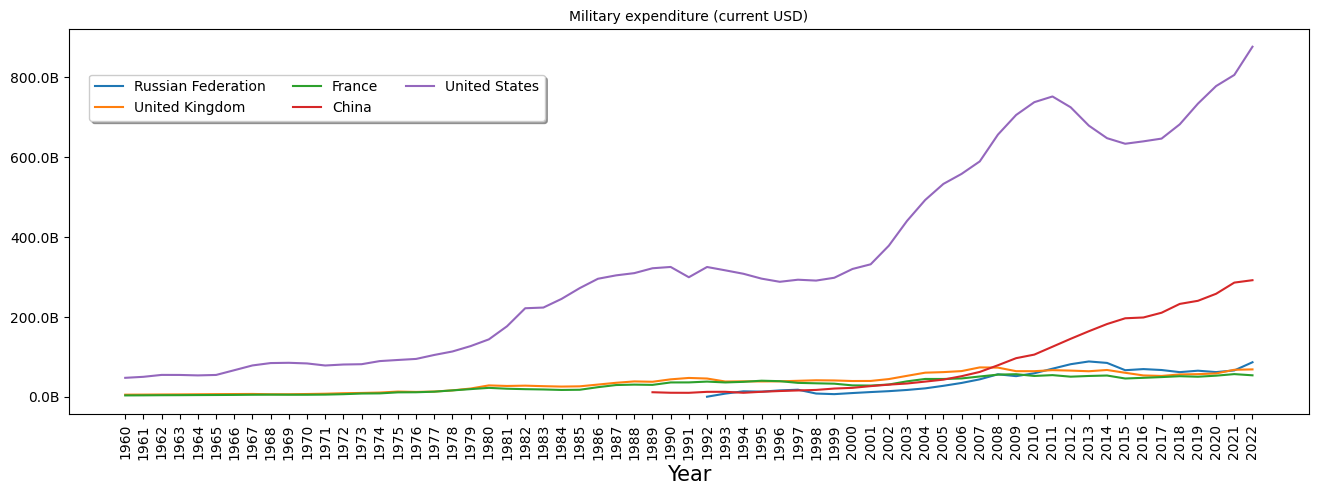

In [55]:
plotyears(mil1,['Russian Federation','United Kingdom','France','China','United States'],1,'Military expenditure (current USD)')

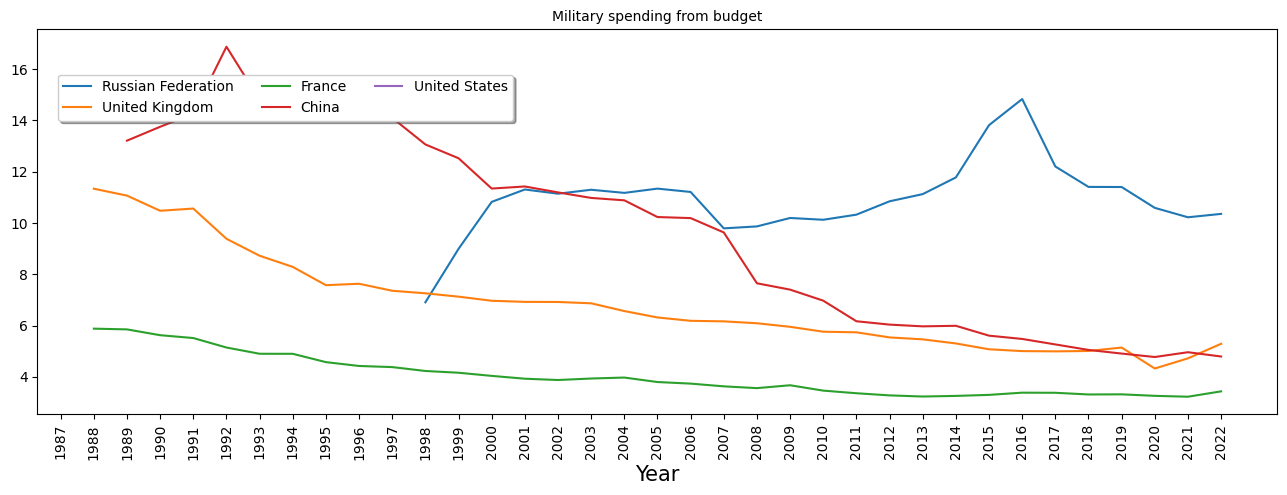

In [61]:
plotyears(mil2,['Russian Federation','United Kingdom','France','China','United States'],0,'Military spending from budget')

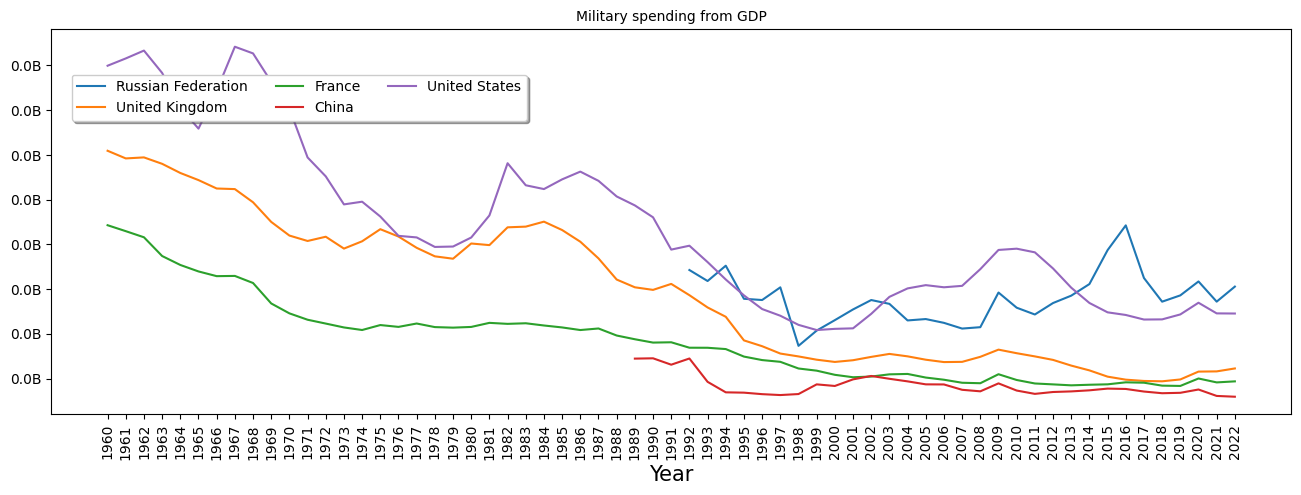

In [62]:
plotyears(mil3,['Russian Federation','United Kingdom','France','China','United States'],1,'Military spending from GDP')